This notebbok contents is:

1. Problem
2. Train test split
3. Simple EDA
  * Descritive Statistics and data cleaning
  * numerical features
  * Categorical Features
4. Model variations
 * Apply One-hot encoding
 * Apply Square root transformation
 * Apply Standard scaling
 * Add Polynomial Features

5. Cross-validation and Regularization

 * Linear Regression
 * Lasso Regression (L1)
 * Ridge Regression(L2)
 * Elastic Net Regression (L1 + L2)
 * Compare the metrics

6. Predict on the test set
 * Scatter plots of four models
 * Feature Importance

7. Conclusion


# 1. Problem

The main objective of this analysis is to predict price(£) of uses ford cars using Linear Regressions.

# 2. Train test split

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set()
%matplotlib inline

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/portifolio/ford_regularization/ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [56]:
df.shape

(17965, 9)

In [4]:
#check duplicated rows
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
159,Focus,2016,10995,Manual,30923,Diesel,0,74.3,1.5
312,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
349,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
510,EcoSport,2019,15489,Manual,5636,Diesel,145,68.9,1.5
512,Grand Tourneo Connect,2019,19999,Manual,3500,Diesel,145,61.4,1.5
...,...,...,...,...,...,...,...,...,...
14556,Mondeo,2015,6793,Manual,138000,Diesel,20,68.9,2.0
15121,Kuga,2017,14999,Manual,24877,Diesel,30,64.2,1.5
15127,EcoSport,2019,16799,Automatic,433,Petrol,150,45.6,1.0
15685,KA,2008,1795,Manual,63000,Petrol,160,45.6,1.3


In [5]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
#check duplicated rows
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(17811, 9)

In [9]:
#split the data

from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, test_size = 0.20, random_state= 0)
print(f'Training and validation set size: {train_val.shape}')
print(f'Test set size: {test.shape}')


Training and validation set size: (14248, 9)
Test set size: (3563, 9)


In [10]:
# Divide the train_val between train and val for cross-validation
train, val = train_test_split(train_val, test_size= 0.25, random_state=0)

print(f'Training set size: {train.shape}')
print(f'Validation set size: {val.shape}')



Training set size: (10686, 9)
Validation set size: (3562, 9)


# 3. Simple EDA

In [64]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14875,Kuga,2016,12000,Manual,21569,Diesel,125,60.1,2.0
10148,B-MAX,2016,9995,Semi-Auto,17900,Petrol,160,44.1,1.6
10329,Fiesta,2017,9280,Manual,28000,Petrol,145,62.8,1.0
5949,Fiesta,2019,16295,Semi-Auto,7698,Petrol,145,48.7,1.0
11779,Mustang,2017,48999,Automatic,7546,Petrol,145,23.5,5.0


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 14875 to 2308
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10686 non-null  object 
 1   year          10686 non-null  int64  
 2   price         10686 non-null  int64  
 3   transmission  10686 non-null  object 
 4   mileage       10686 non-null  int64  
 5   fuelType      10686 non-null  object 
 6   tax           10686 non-null  int64  
 7   mpg           10686 non-null  float64
 8   engineSize    10686 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 834.8+ KB


In [66]:
train.describe()

,year,price,mileage,tax,mpg,engineSize
count,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000
mean,2016.870017,12274.090118,23344.321168,113.443758,57.850926,1.353977
std,2.056717,4771.685341,19499.540207,61.416648,10.169595,0.434362
min,1996.000000,675.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9975.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18229.500000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,30970.000000,145.000000,65.700000,1.500000
max,2060.000000,49999.000000,174000.000000,580.000000,201.800000,5.000000


In [67]:
# Add in new feature age, and remove year
train['age'] = 2021 - train['year']
train.drop(['year'], axis=1, inplace=True)
train

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
14875,Kuga,12000,Manual,21569,Diesel,125,60.1,2.0,5
10148,B-MAX,9995,Semi-Auto,17900,Petrol,160,44.1,1.6,5
10329,Fiesta,9280,Manual,28000,Petrol,145,62.8,1.0,4
5949,Fiesta,16295,Semi-Auto,7698,Petrol,145,48.7,1.0,2
11779,Mustang,48999,Automatic,7546,Petrol,145,23.5,5.0,4
...,...,...,...,...,...,...,...,...,...
14608,Kuga,4352,Manual,128046,Diesel,240,44.1,2.0,12
10355,B-MAX,7599,Manual,32505,Petrol,30,57.7,1.0,7
1446,Fiesta,12610,Manual,13589,Petrol,145,56.5,1.0,2
1860,Focus,8000,Manual,58774,Diesel,0,74.3,1.5,5


In [68]:
#Check the ages to see if there's is outliers
train['age'].unique()

array([  5,   4,   2,   3,   7,   8,   6,  10,   1,  11,   9,  14,  13,
        16,  12,  15,  19,  25,  17, -39,  21])

In [69]:
#Outliers in age
train[train['age'] == -39].index[0]


17572

In [70]:

train.drop(index= train[train['age'] == -39].index[0], axis=1, inplace= True)

In [71]:
# Determine columns by data types

cat_mask = (train.dtypes == np.object)
num_mask = (train.dtypes == np.float64) | (train.dtypes == np.int64)

cat_features = train.columns[cat_mask].tolist()
num_features = train.columns[num_mask].tolist()


print(f'Categorical columns: {cat_features}')
print(f'Numerical columns: {num_features}')



Categorical columns: ['model', 'transmission', 'fuelType']
Numerical columns: ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']


### Numerical Features

In [72]:
def hist_loop(data:  pd.DataFrame,
              rows: int, 
              cols: int,
              figsize: tuple):
  
 """ Returns multiple histograms as subplots
    """

 fig, axes = plt.subplots(rows, cols, figsize=figsize)

 for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns):
      data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
      ax.set_title(f'{sorted(data.columns)[i]} distribution')
      ax.tick_params(axis='x')
      ax.tick_params(axis='y')
      ax.get_yaxis().get_label().set_visible(False)
    
    else:
      fig.delaxes(ax=ax)

 fig.tight_layout()



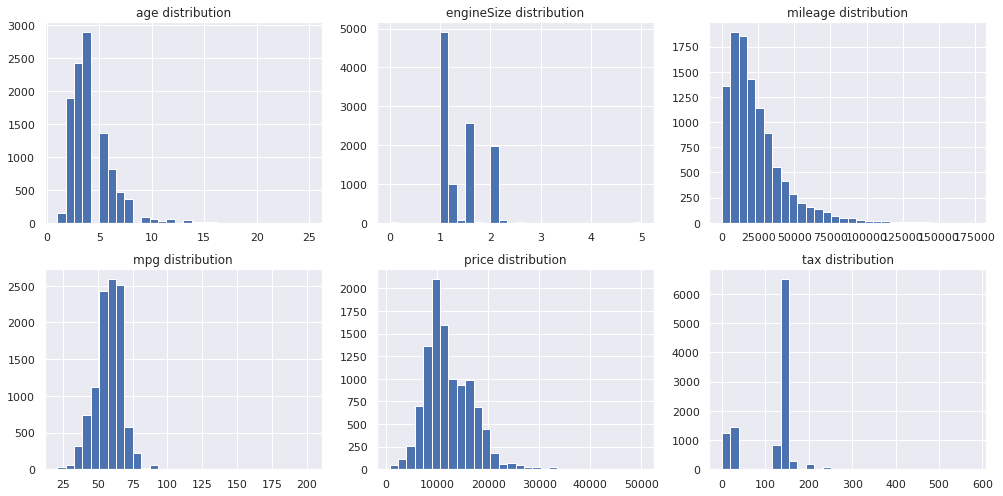

In [73]:
# Plot all numerical features

hist_loop(data=train[num_features], rows=2, cols=3, figsize=(14,7))

Now, let's check the skewness of all numerical features

In [74]:
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
  # define a limit above which we will tranform

  skew_vals= data.skew()

  # Showing the skewed columns

  skew_cols = (skew_vals
               .sort_values(ascending=False)
               .to_frame('Skew')
               .query('abs(Skew) > {}'.format(skew_limit)))

  return skew_cols

In [75]:


skew_cols = skew_df(train[num_features], 0.70)
skew_cols

,Skew
engineSize,1.990589
mileage,1.842012
age,1.839659
price,1.162327


· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.  
· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed.   
· If the skewness is less than -1 or greater than 1, the data are highly skewed

A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.

A negative skewness value in the output indicates an asymmetry in the distribution corresponding the tail is larger towards the left hand side of the distribution.

A positive skewness value in the output indicates an asymmetry in the distribution corresponding the tail is larger towards the right hand side of the distribution

Almost all features are right-skewed. The exception is tax and mpg. Also, there are zero values in engineSize(eletric car). Therefore, Square root transformation might be a good choice to eliminate the skewness.

In [76]:
# Applying square root transformation on features
train_transform = train[num_features].drop('price', axis=1).copy()

for col in list(skew_cols.index):
  if col != 'price':
    train_transform[col] = train_transform[col].apply(np.sqrt)



In [77]:
# Look for skewd features again
skew_df(train_transform, 0.70)

,Skew
age,0.82975


Well, it's seems that we can do better with age. Let's try to apply log transformation. 

In [78]:
for col in list(skew_cols.index):
  if col == 'age':
    train_transform[col] = train_transform[col].apply(np.log)

In [79]:
# Look for skewd features again
skew_df(train_transform, 0.70)

,Skew


Here  you go, skewness is fixed. Let's use a pairplot to have an overview of these features and the target.

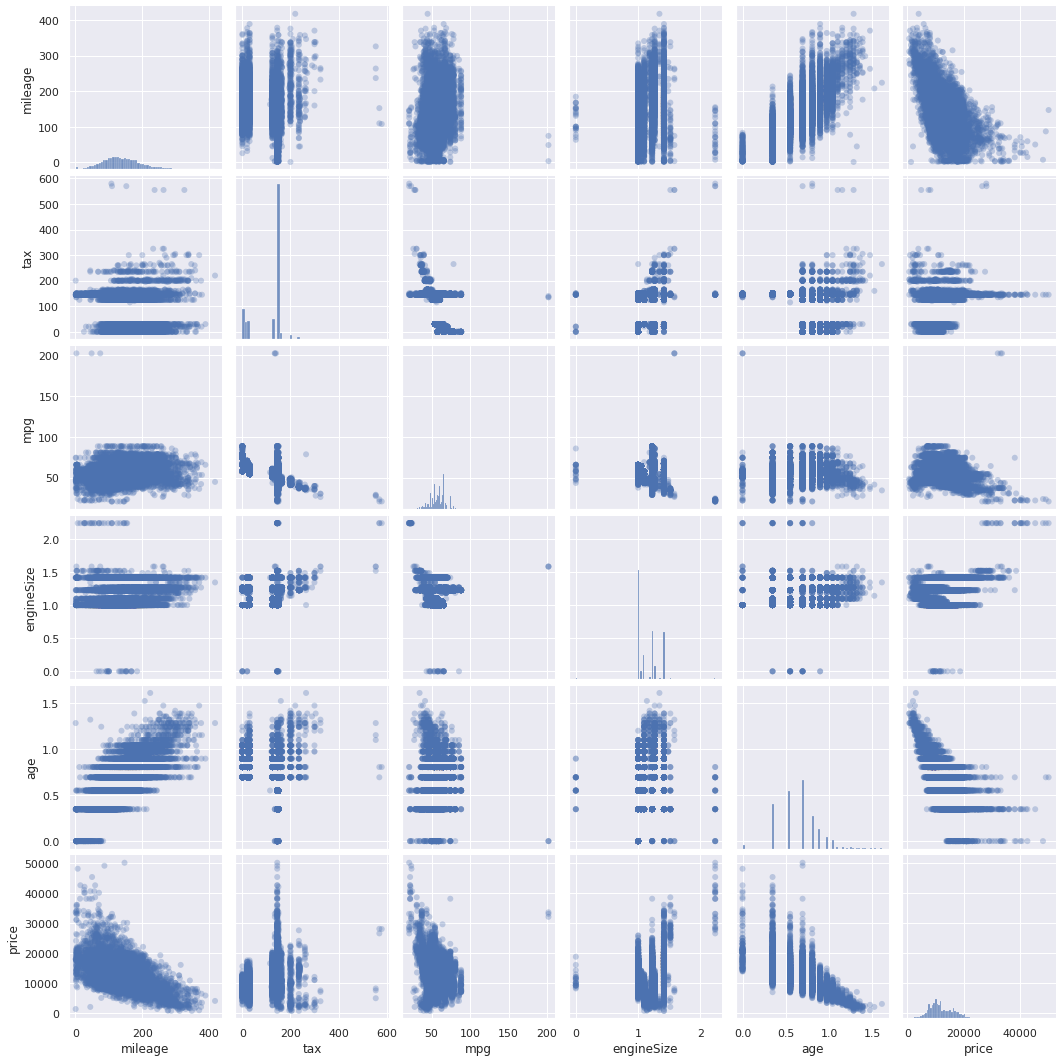

In [80]:
sns.pairplot(train_transform.join(train['price']), plot_kws=dict(alpha=.3, edgecolor='none'))

Age has negative linear relationship with price. It means that more older are cheapers.
Age also has a linear relationship with mileage (the older the more miles). This is multicollinearity.

Let's have a look at  how  severe the multicollinearity is.

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. 

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.


The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.


**A rule of thumb for interpreting the variance inflation factor:**

1 = not correlated.   
Between 1 and 5 = moderately correlated.   
Greater than 5 = highly correlated.   

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif =  pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [82]:
calc_vif(train_transform)

,variables,VIF
0,mileage,14.835802
1,tax,5.246805
2,mpg,17.217603
3,engineSize,30.471097
4,age,21.194890


The features have high multicollinearity. This problem might be resolved by regularization later.

## Categorical features

Let's check the categorical features

In [83]:
train.describe(include=np.object)

,model,transmission,fuelType
count,10685,10685,10685
unique,22,3,5
top,Fiesta,Manual,Petrol
freq,3890,9240,7267


In [84]:
set(train['model'])

{' B-MAX',
 ' C-MAX',
 ' EcoSport',
 ' Edge',
 ' Escort',
 ' Fiesta',
 ' Focus',
 ' Fusion',
 ' Galaxy',
 ' Grand C-MAX',
 ' Grand Tourneo Connect',
 ' KA',
 ' Ka+',
 ' Kuga',
 ' Mondeo',
 ' Mustang',
 ' Puma',
 ' S-MAX',
 ' Streetka',
 ' Tourneo Connect',
 ' Tourneo Custom',
 ' Transit Tourneo'}

We need to remove leading spaces

In [85]:
train['model'] = train['model'].str.strip(' ')
set(train['model'])

{'B-MAX',
 'C-MAX',
 'EcoSport',
 'Edge',
 'Escort',
 'Fiesta',
 'Focus',
 'Fusion',
 'Galaxy',
 'Grand C-MAX',
 'Grand Tourneo Connect',
 'KA',
 'Ka+',
 'Kuga',
 'Mondeo',
 'Mustang',
 'Puma',
 'S-MAX',
 'Streetka',
 'Tourneo Connect',
 'Tourneo Custom',
 'Transit Tourneo'}

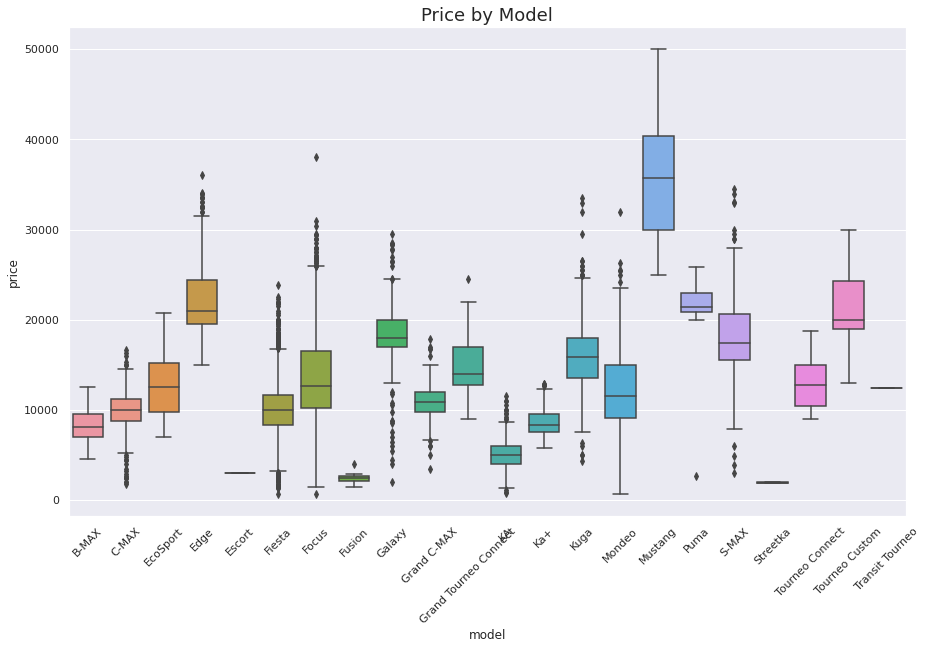

In [86]:
# Let's make a boxplot of model and price

fig, ax = plt.subplots(figsize=(15,9))
order = sorted(set(train['model']))
sns.boxplot(x='model', y='price', data=train, order=order, ax=ax)
plt.xticks(rotation=45)
plt.title('Price by Model', fontsize=18)
plt.show()

Now, it's time to see the transmission and fuelType features

In [87]:
set(train['transmission'])

{'Automatic', 'Manual', 'Semi-Auto'}

In [88]:
set(train['fuelType'])

{'Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'}

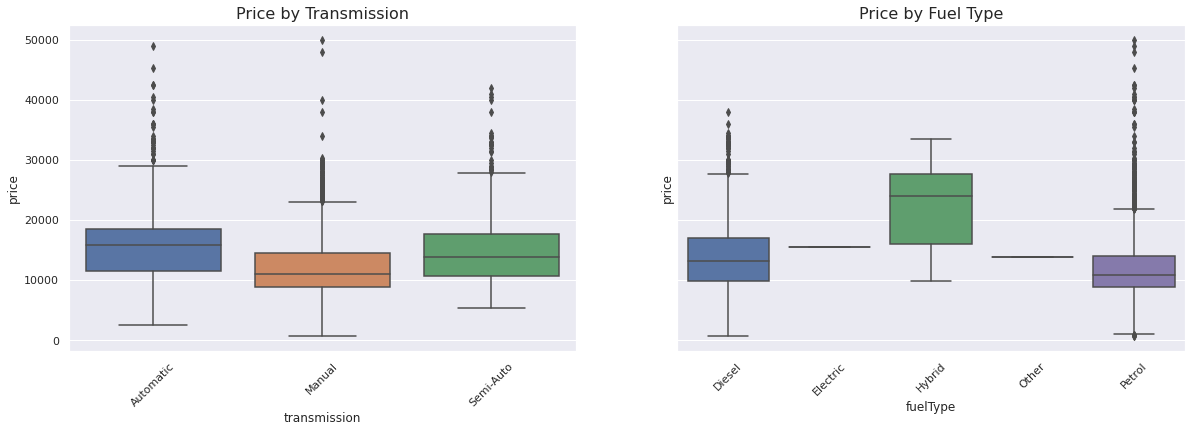

In [89]:
# box plots of price and transmission / fuel type

fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)

order0 = sorted(set(train['transmission']))
sns.boxplot(x='transmission', y='price', data=train, order=order0, ax=ax[0])
ax[0].set_title('Price by Transmission', fontsize=16)
ax[0].tick_params('x', labelrotation=45)


order1 = sorted(set(train['fuelType']))
sns.boxplot(x='fuelType', y='price', data=train, order=order1, ax=ax[1])
ax[1].set_title('Price by Fuel Type', fontsize=16)
ax[1].tick_params('x', labelrotation=45)

plt.show()

As we could see, car prices are different among models, transmission and fuel types.

# 3. Model variations

In this section, we will perform some features engineering in order  fit linear regression and compare the root mean square errors.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures


In [163]:
df = train_val.copy()
df.shape

(14248, 9)

In [164]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8885,Kuga,2017,14900,Manual,21419,Diesel,145,60.1,2.0
693,Grand C-MAX,2017,13498,Manual,8913,Petrol,145,54.3,1.0
16898,B-MAX,2013,5999,Manual,40306,Petrol,30,55.4,1.0
17604,Focus,2006,2495,Automatic,70730,Petrol,260,36.7,1.6
2444,KA,2016,6340,Manual,13954,Petrol,30,57.7,1.2
...,...,...,...,...,...,...,...,...,...
9225,Fiesta,2015,6970,Manual,54790,Diesel,0,88.3,1.5
13123,Kuga,2019,20000,Manual,5511,Petrol,150,35.3,1.5
9845,EcoSport,2017,10795,Manual,13383,Petrol,145,52.3,1.0
10799,Kuga,2017,15000,Manual,12555,Diesel,145,60.1,2.0


In [165]:
# Cass for feature engineering and model fitting

class LR_model:
  #default values
  target = 'price'
  test_size = 0.25
  random_state = 0

  sqrt_trans_features = ['engineSize', 'mileage']
  log_trans_feature = ['age']

  def __init__(self, data):
    self.train, self.test = train_test_split(data, test_size=LR_model.test_size, random_state=LR_model.random_state)



  def clean_data(self, df):
    """ Cleaning data by tranforming year in age, 
    dropping the year feature and 
    removing leading spaces from model """

    df['age'] = 2021 - df['year']
    df.drop(['year'], axis=1, inplace=True)

    #Removing outlier from age
    if df[df['age'] == -39].index > 0:
      df.drop(index= df[df['age'] == -39].index, axis=1, inplace= True)
    
    return df



  def one_hot_enc(self,X_train, X_test):
    """ 
    Performs one-hot-encoding and 
    drops the first category
    """

    OHT = OneHotEncoder(handle_unknown='ignore', sparse=False)

    #filter categorical features only

    X_train_cat = X_train.select_dtypes(include=['object'])
    X_test_cat = X_test.select_dtypes(include=['object'])


    # Fit one-hot encoding on training set
    # Transform both training set and test set
    
    X_train_en = OHT.fit_transform(X_train_cat)
    X_test_en = OHT.transform(X_test_cat)

  

    #Drop one column of each category

    for col in X_train_cat.columns.tolist():
      cat_cols = X_train_cat.columns[X_train_cat.columns.str.startswith(col)].tolist()

      if len(cat_cols) > 1:
        X_train_cat.drop(cat_cols[0], axis=1, inplace=True)

    #Drop one column of each category

    for col in X_test_cat.columns.tolist():
      cat_cols = X_test_cat.columns[X_test_cat.columns.str.startswith(col)].tolist()

      if len(cat_cols) > 1:
        X_test_cat.drop(cat_cols[0], axis=1, inplace=True)


    # Join dummy values with numerical features
    
    X_train_en_df = pd.DataFrame(X_train_en,
                                      index=X_train.index,
                                      columns=OHT.get_feature_names_out(X_train_cat.columns.tolist()))
    
    X_train =  X_train_en_df.join(X_train.select_dtypes(exclude=['object']))


    # Join dummy values with numerical features
    
    X_test_en_df = pd.DataFrame(X_test_en,
                                      index=X_test.index,
                                      columns=OHT.get_feature_names_out(X_test_cat.columns.tolist()))
    
    X_test =  X_test_en_df.join(X_test.select_dtypes(exclude=['object']))


    
    
    
    return X_train, X_test

  def log_trans(self, df):
    df[LR_model.log_trans_feature] =  df[LR_model.log_trans_feature].apply(np.log)

    return df
  
  def sqrt_trans(self,df):
    df[LR_model.sqrt_trans_features] =  df[LR_model.sqrt_trans_features].apply(np.sqrt)
    
    return df


  def apply_stand_scaling(self, X_train, X_test):

    """ 
      Applies standard scaling for all numerical features
     """

    scaler = StandardScaler()

    #filter numerical features only(excluding binary values)

    float_features = X_train.columns[~X_train.isin([0,1]).all()].tolist()

    # Fit and transform. 


    X_train[float_features] = scaler.fit_transform(X_train[float_features])

    X_test[float_features] = scaler.transform(X_test[float_features])

    return X_train, X_test

    
  def add_pf(self, X_train, X_test, degree=None):

        """ Adds polynomial features into the dataset
        """
        
        PF = PolynomialFeatures(degree=degree, include_bias=False)

        # Filter numerical features only (excluding binary values)
        float_cols = X_train.columns[~X_train.isin([0,1]).all()].tolist()

        # Fit features in traning set and transform to test set
        X_train_pf = PF.fit_transform(X_train[float_cols])
        X_test_pf = PF.transform(X_test[float_cols])
        
        # Add non-numerical features back into the transformed training set
        X_train_pf_df = pd.DataFrame(X_train_pf,
                                     index=X_train.index,
                                     columns=PF.get_feature_names(input_features=float_cols))
        X_train = X_train_pf_df.join(X_train[X_train.columns[~X_train.columns.isin(float_cols)].tolist()])
        
       # Add non-numerical features back into the transformed test set
        X_test_pf_df = pd.DataFrame(X_test_pf,
                                    index=X_test.index,
                                    columns=PF.get_feature_names(input_features=float_cols))
        X_test = X_test_pf_df.join(X_test[X_test.columns[~X_test.columns.isin(float_cols)].tolist()])
        
        return X_train, X_test
  
  def rmse(self, y_true, y_predicted):

    """ Returns root mean squared error"""
    return np.sqrt(mean_squared_error(y_true, y_predicted))

  
  def model_fit(self, label=None,
                    encoding=False,
                    squareroot=False,
                    logtransform = False,
                    scaling=False,
                    polynomial=False,
                    degree=None):
          
          """ Fits linear regression model and returns 
          RMSE of training set and test set
          """

          # Split data
          train, test = self.clean_data(self.train), self.clean_data(self.test)
          X_train, X_test = train.drop(LR_model.target, axis=1), test.drop(LR_model.target, axis=1)
          y_train, y_test = train[LR_model.target], test[LR_model.target]

          # Perform feature engineering
          if encoding:
              X_train, X_test = self.one_hot_enc(X_train, X_test)

          if not encoding:
            X_train, X_test = X_train.select_dtypes(exclude=['object']), X_test.select_dtypes(exclude=['object'])

          if squareroot:
              X_train, X_test = self.sqrt_trans(X_train), self.sqrt_trans(X_test)
          
          if logtransform:
            X_train, X_test = self.log_trans(X_train), self.log_trans(X_test)

          if scaling:
              X_train, X_test = self.apply_stand_scaling(X_train, X_test)
          
          if polynomial:
              X_train, X_test = self.add_pf(X_train, X_test, degree)
          
          num_features = X_train.shape[1]
          # Fit model and predict the target
          LR = LinearRegression()
          LR.fit(X_train, y_train)
          y_train_pred = LR.predict(X_train)
          y_test_pred = LR.predict(X_test)
          
          # Compute RMSE and store in a dictionary
          rmse_train = self.rmse(y_train, y_train_pred)
          rmse_test = self.rmse(y_test,  y_test_pred)
          scores = {
              'Model': label,
              'Number of features': num_features,
              'RMSE train': rmse_train,
              'RMSE test': rmse_test
          }
          
          return scores

    



**fit_transform and transform**

We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

In [166]:
df = train_val.copy()
df.shape

(14248, 9)

**Apply One-hot encoding**

**One-Hot-Encoding and label encoding**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.


One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

One-Hot Encoding is the process of creating dummy variables. In this encoding technique, each category is represented as a one-hot vector. 



In [167]:
# Fit LR model in each set and print out RMSE
error_df = [] # Blank error list to create a data frame later

# Fit non-encoded data
not_enc = LR_model(df).model_fit(label='not encoded')

# Fit encoded data
enc = LR_model(df).model_fit(label='one hot encoded', encoding=True)

# Print out error table
error_df = pd.DataFrame.from_dict([not_enc])
error_df = error_df.append(enc, ignore_index=True)
error_df

,Model,Number of features,RMSE train,RMSE test
0,not encoded,5,2417.704702,2433.946482
1,one hot encoded,35,1820.622688,1834.399643


**Apply Square root and Log transformation**

In [168]:
# Fit non-encoded data
not_enc_bc = LR_model(df).model_fit(label='not encoded + squareroot + logtransform', squareroot=True, logtransform=True)

# Fit encoded data
enc_bc = LR_model(df).model_fit(label='one hot encoded + squareroot + logtransform', encoding=True, squareroot=True, logtransform=True)

# Print out error table
error_df = error_df.append([not_enc_bc, enc_bc], ignore_index=True)
error_df

,Model,Number of features,RMSE train,RMSE test
0,not encoded,5,2417.704702,2433.946482
1,one hot encoded,35,1820.622688,1834.399643
2,not encoded + squareroot + logtransform,5,2384.505913,2453.595561
3,one hot encoded + squareroot + logtransform,35,1680.625130,1737.315820


The transformation improves all models. The one that has encoded features is the best so far.

**Apply Standard scaling**

In [169]:
# Fit encoded data
enc_bc_s = LR_model(df).model_fit(label='one hot encoded + squareroot + logtransform + scaled', encoding=True, squareroot=True, logtransform=True, scaling=True)

# Print out error table
error_df = error_df.append(enc_bc_s, ignore_index=True)
error_df

,Model,Number of features,RMSE train,RMSE test
0,not encoded,5,2417.704702,2433.946482
1,one hot encoded,35,1820.622688,1834.399643
2,not encoded + squareroot + logtransform,5,2384.505913,2453.595561
3,one hot encoded + squareroot + logtransform,35,1680.625130,1737.315820
4,one hot encoded + squareroot + logtransform + ...,35,1680.695526,1737.270159


**Add Polynomial features**

In [174]:
# Create blank error table
error_pf_df = pd.DataFrame(columns=['Model', 'Number of features', 'RMSE train', 'RMSE test'])

# Iterate different degree, 1 to 5
for d in list(range(1,6)):
    error = LR_model(df).model_fit(label=f'Degree = {d}', encoding=True,squareroot=True, logtransform=True, scaling=True, polynomial=True, degree=d)
    error_pf_df = error_pf_df.append(error, ignore_index=True)

# Print out the error table
error_pf_df

,Model,Number of features,RMSE train,RMSE test
0,Degree = 1,35,1680.623756,1737.359928
1,Degree = 2,50,1554.712864,1598.567575
2,Degree = 3,85,1505.880669,1563.453971
3,Degree = 4,155,1400.264681,1720.726510
4,Degree = 5,281,1325.452093,3848.721851


No handles with labels found to put in legend.


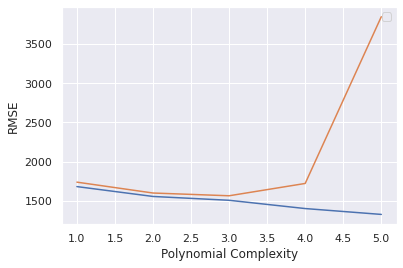

In [175]:
plt.plot(range(1,6), error_pf_df['RMSE train'])
plt.plot(range(1,6),error_pf_df['RMSE test'])
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")

plt.legend()
plt.show()

As we can see in the graph above, it looks like the third polynomial degree transformation returns the best model. At degree 4 and above, as the model gets more and more complex, it starts overfitting.

# 4. Cross-validation and Regularization

In [16]:
# Import libraries
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features

In [12]:
# 5-fold cross validation
kf = KFold(shuffle=True, random_state=0, n_splits=5)

**Kfold:** The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

In [13]:
df['age'] = 2021 - df['year']

#Removing outlier from age
if df[df['age'] == -39].index > 0:
  df.drop(index= df[df['age'] == -39].index, axis=1, inplace= True)

df = df.drop(['year'], axis=1)
df['model'] = df['model'].str.strip(' ')

X = df.drop('price', axis=1)
y = df['price']

In [14]:
# Create a class for data pipeline
class XPipe:
  sqrt_trans_features = ['engineSize', 'mileage']
  log_trans_feature = ['age']

  def __init__(self, X):
    self.cat_cols = X.select_dtypes(include=['object']).columns.tolist()
    self.num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

  
  def drop_first(self, cat_values):

    """ Drops one category after one-hot encoding"""

    dummy_df = pd.DataFrame(cat_values)
    dummy_df = dummy_df.drop(0, axis=1)

    return dummy_df.values


  def sqrt_trans(self, num_values):

    """ Applies square root transformation to skewed features"""

    num_df = pd.DataFrame(num_values, columns=self.num_cols)
    num_df[XPipe.sqrt_trans_features] = num_df[XPipe.sqrt_trans_features].apply(np.sqrt)
    
    return num_df.values

  def log_trans(self, num_values):

    """ Applies square root transformation to skewed features"""

    num_df = pd.DataFrame(num_values, columns=self.num_cols)
    num_df[XPipe.log_trans_feature] = num_df[XPipe.log_trans_feature].apply(np.log)
    
    return num_df.values
  
  def model_pipe(self, model, degree=2):

     """ Returns a data pipeline"""

     cat_list = [[col] for col in self.cat_cols]
     cat_features = gen_features(
         columns=cat_list,
         classes=[{'class': OneHotEncoder, 'handle_unknown':'ignore', 'sparse':False},
                  {'class': FunctionTransformer, 'func': self.drop_first}]
     )



     mapper =  DataFrameMapper(cat_features + [
            (self.num_cols, [FunctionTransformer(self.sqrt_trans),
                             FunctionTransformer(self.log_trans),
                             StandardScaler(),
                             PolynomialFeatures(degree=degree, include_bias=False)])                                   
     ])
     return make_pipeline(mapper, model)



In [18]:
XPipe(X).model_pipe(LinearRegression())

Pipeline(steps=[('dataframemapper',
                 DataFrameMapper(features=[(['model'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <__main__.XPipe object at 0x7fb21aeb0350>>)]),
                                           (['transmission'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <...
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <__main__.XPipe object at 0x7fb21aeb0350>>)]),
                                           (['mileage', 'tax', 'mpg',
                                             'engi

In [40]:
# Create a blank dictionary to store metrics of different models
metrics = {}

**Linear Regression**

In the train test split part, adding the third degree polynomial features returns the best model. Let's see if cross-validation returns different results.

In [20]:
# Blank dictionary to add in metrics
lr_scores = {}

#Iterate over different degrees, 1 to 5
for d in list(range(1,6)):
    score = cross_val_score(XPipe(X)
                            .model_pipe(LinearRegression(), degree=d),
                            X, y, cv=kf, scoring='neg_mean_squared_error')
    lr_scores[f'Degree = {d}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out
lr_rmse = pd.DataFrame.from_dict(lr_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
lr_rmse

,Average RMSE
Degree = 3,1577.884535
Degree = 2,1587.539071
Degree = 1,1719.477842
Degree = 4,1922.327139
Degree = 5,7369.412361


No handles with labels found to put in legend.


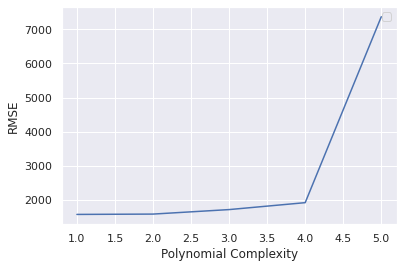

In [21]:
plt.plot(range(1,6), lr_rmse['Average RMSE'])
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")

plt.legend()
plt.show()

Although  the degree 4 has the better Average RMSE, we should get degree 3 since the diference is not bigget and it add's lower risk to out model.

In [22]:
# Calculate average R squared
lr_r2_scores = cross_val_score(XPipe(X)
                              .model_pipe(LinearRegression(), degree=3),
                              X, y, cv=kf)
lr_r2_scores

array([0.86802778, 0.89190569, 0.90545006, 0.88335002, 0.89439924])

In [41]:
# Store the metrics
metrics['Average RMSE'] = [lr_rmse['Average RMSE'].values[0]]
metrics['Average R2'] = [np.mean(lr_r2_scores)]

**Ridge Regression (L2)**

L2 regularization adds a penalty equal to the square of the magnitude of coefficients. 
All coefficients are shrunk by the same factor.
Does not necessarily eliminate coefficients.


In [24]:
# Blank dictionary to add in metrics
ridge_scores = {}

# Iterate over different alphas
for d in [1, 2, 3]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Ridge(alpha=a, max_iter=100000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')

                                
        ridge_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out (first 5 rows)
ridge_rmse = pd.DataFrame.from_dict(ridge_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
ridge_rmse.head(5)

,Average RMSE
"Degree = 3, alpha = 0.1",1577.859921
"Degree = 3, alpha = 0.05",1577.865955
"Degree = 3, alpha = 0.01",1577.879683
"Degree = 3, alpha = 0.005",1577.882034
"Degree = 3, alpha = 0.3",1577.923628


In [25]:
# Calculate average R squared
ridge_r2_scores = cross_val_score(XPipe(X)
                                  .model_pipe(Ridge(alpha=0.1, max_iter=100000), degree=3),
                                  X, y, cv=kf)
ridge_r2_scores

array([0.86798257, 0.89192037, 0.90541723, 0.88342465, 0.89440419])

In [42]:
# Store the metrics
metrics['Average RMSE'].append(ridge_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(ridge_r2_scores))

**Lasso Regression (L1)**

L1 regularization adds a penalty equal to the absolute value of the magnitude of coefficients. 
Limits the size of the coefficients. 
Can yield sparse models where some coefficients can become zero.


In [27]:
# Blank dictionary to add in metrics
las_scores = {}

# Iterate over different alphas
for d in [1, 2, 3]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=a, max_iter=100000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
            
        las_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out (first 5 rows)
las_rmse = pd.DataFrame.from_dict(las_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
las_rmse.head(5)

,Average RMSE
"Degree = 3, alpha = 0.3",1577.177797
"Degree = 3, alpha = 0.1",1577.508264
"Degree = 3, alpha = 0.05",1577.647894
"Degree = 3, alpha = 0.01",1577.828952
"Degree = 3, alpha = 0.005",1577.856233


In [38]:
# Calculate average R squared
las_r2_scores = cross_val_score(XPipe(X)
                                .model_pipe(Lasso(alpha=0.3, max_iter=100000), degree=3),
                                X, y, cv=kf)
las_r2_scores

array([0.86817943, 0.89210291, 0.90522402, 0.88378802, 0.89437074])

In [43]:
# Store the metrics
metrics['Average RMSE'].append(las_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(las_r2_scores))

It's very similar to L2, but a bit worse.

**Elastic Net Regresstion (L1 + L2)**

In [30]:
# Blank dictionary to add in metrics
elasticnet_scores = {}

# Iterate over different alphas
for d in [1, 2, 3]:
    for a in [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]:
        score = cross_val_score(XPipe(X)
                                .model_pipe(ElasticNet(alpha=a, max_iter=100000), degree=d),
                                X, y, cv=kf, scoring='neg_mean_squared_error')
        elasticnet_scores[f'Degree = {d}, alpha = {a}'] = np.mean(np.sqrt(-score))

# Create an error table and print it out (first 5 rows)
elasticnet_rmse = pd.DataFrame.from_dict(elasticnet_scores, orient='index', columns=['Average RMSE']).sort_values('Average RMSE')
elasticnet_rmse.head(5)

,Average RMSE
"Degree = 2, alpha = 0.005",1637.271589
"Degree = 3, alpha = 0.005",1638.683508
"Degree = 2, alpha = 0.01",1674.992278
"Degree = 3, alpha = 0.01",1677.963453
"Degree = 1, alpha = 0.005",1800.234051


In [69]:
# Calculate average R squared
elasticnet_r2_scores = cross_val_score(XPipe(X)
                                       .model_pipe(ElasticNet(alpha= 0.005, max_iter=100000), degree=3),
                                       X, y, cv=kf)
elasticnet_r2_scores

array([0.85438016, 0.88222945, 0.89925448, 0.87685823, 0.88624845])

In [44]:
# Store the metrics
metrics['Average RMSE'].append(elasticnet_rmse['Average RMSE'].values[0])
metrics['Average R2'].append(np.mean(elasticnet_r2_scores))


Not so good as the others. 

**Compare the metrics**

In [45]:
# Create a comparison table
metrics['Model'] = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']
pd.DataFrame.from_dict(metrics).set_index('Model').sort_values('Average RMSE')

,Average RMSE,Average R2
Model,,
Lasso,1577.177797,0.888733
Ridge,1577.859921,0.888630
Linear,1577.884535,0.888627
Elastic Net,1637.271589,0.880330


Lasso was the best model

#5. Predict on the test set

Let's use four models to make prediction on the unseen test set.

In [58]:
# Keep the original data
train_df, test_df = train.copy(), test.copy()

In [59]:
train_df['age'] = 2021 - train_df['year']

#Removing outlier from age
if train_df[train_df['age'] == -39].index > 0:
  train_df.drop(index= train_df[train_df['age'] == -39].index, axis=1, inplace= True)

train_df = train_df.drop(['year'], axis=1)
train_df['model'] = train_df['model'].str.strip(' ')

X_test = train_df.drop('price', axis=1)
y_test = train_df['price']

In [60]:
# Clean the training set
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']

In [61]:
test_df['age'] = 2021 - test_df['year']

#Removing outlier from age
if test_df[test_df['age'] == -39].index > 0:
  test_df.drop(index= test_df[test_df['age'] == -39].index, axis=1, inplace= True)

test_df = test_df.drop(['year'], axis=1)
test_df['model'] = test_df['model'].str.strip(' ')

X_test = test_df.drop('price', axis=1)
y_test = test_df['price']

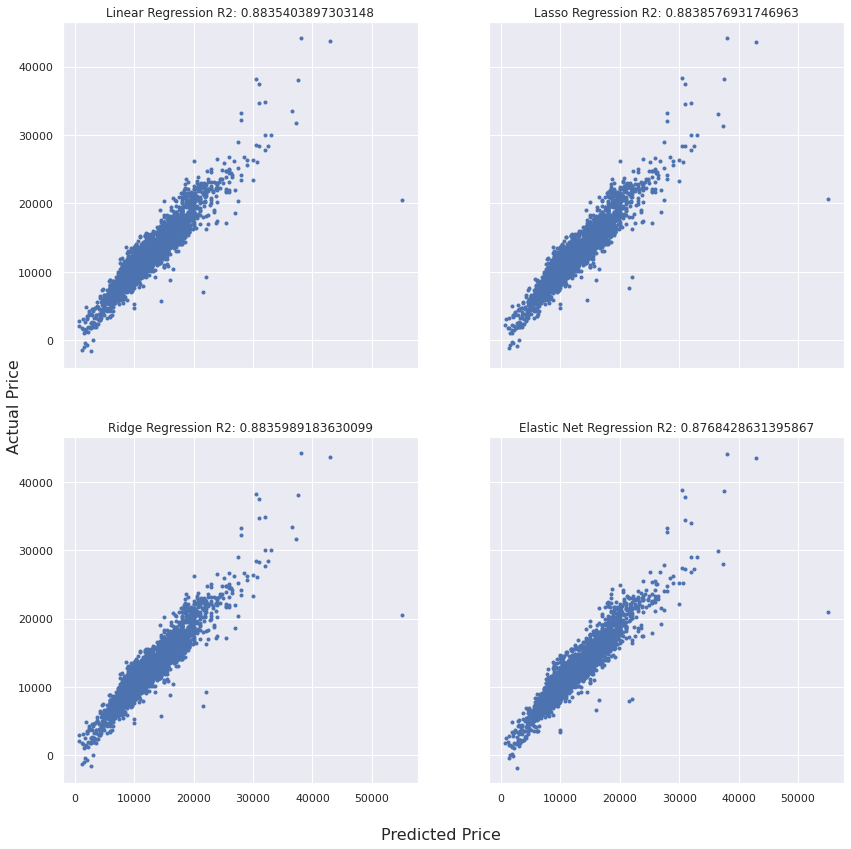

In [64]:
# Make prediction on the test set and plot four scatter plots separately

fig, axes = plt.subplots(2,2, figsize=(14,14), sharex=True, sharey=True)
fig.text(0.5, 0.07, 'Predicted Price', ha='center', fontdict={'size': 16})
fig.text(0.07, 0.5, 'Actual Price', va='center', rotation='vertical', fontdict={'size': 16})

models = [LinearRegression(), Lasso(alpha=0.3, max_iter=100000),
          Ridge(alpha=0.1, max_iter=100000), ElasticNet(alpha=0.005, max_iter=100000)]

labels = ['Linear', 'Lasso', 'Ridge', 'Elastic Net']

for i, ax in enumerate(axes.flatten()):
    y_pred = (XPipe(X_train)
              .model_pipe(models[i], degree=3)
              .fit(X_train, y_train)
              .predict(X_test))

    r_squared = r2_score(y_test, y_pred)

    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)
    ax.set(title=f'{labels[i]} Regression R2: {r_squared}')

Lasso Regression has the best prediction on the test set. All these models can explain the target around 87% - 88%.

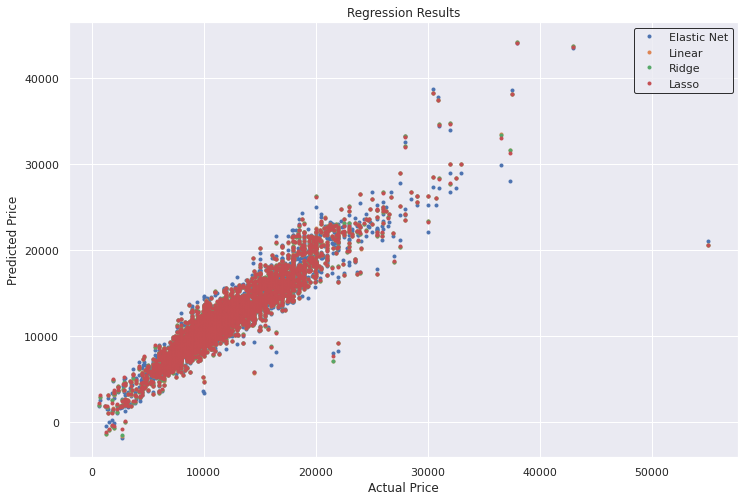

In [73]:
# Make prediction on the test set and plot one combined scatter plot

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

models = [ElasticNet(alpha=0.005, max_iter=100000), LinearRegression(),
          Ridge(alpha=0.1, max_iter=100000), Lasso(alpha=0.3, max_iter=100000)]
         
labels = ['Elastic Net', 'Linear', 'Ridge', 'Lasso']

for mod, lab in zip(models, labels):
    y_pred = (XPipe(X_train)
              .model_pipe(mod, degree=3)
              .fit(X_train, y_train)
              .predict(X_test))
    ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0, label=lab)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Regression Results');

these plots are nearly identical.

**Feature importance**

The Lasso Regression is our best model. Let's see which feature is the most important in the model.

In [71]:
# Have a look at the data pipeline
estimator = XPipe(X_train).model_pipe(Lasso(alpha=0.3, max_iter=100000), degree=3)
estimator.fit(X_train, y_train)

Pipeline(steps=[('dataframemapper',
                 DataFrameMapper(features=[(['model'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <__main__.XPipe object at 0x7fb20b4d4690>>)]),
                                           (['transmission'],
                                            [OneHotEncoder(handle_unknown='ignore',
                                                           sparse=False),
                                             FunctionTransformer(func=<bound method XPipe.drop_first of <...
                                           (['mileage', 'tax', 'mpg',
                                             'engineSize', 'age'],
                                            [FunctionTransformer(func=<bound method XPipe.sqrt_trans of <__main__.XPipe object at 0x7f

In [74]:
# Get the transformer list and feature names
transformers = estimator.named_steps['dataframemapper'].features
cat_cols = XPipe(X_train).cat_cols
num_cols = XPipe(X_train).num_cols